<a href="https://colab.research.google.com/github/vir-dom/Particle-Swarm-Optimization/blob/main/glob_opt_pso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Global Optimization homework 2**

Vastag Emese, Virsinger Dominika, Vlaszov Artúr

# 2D

https://machinelearningmastery.com/a-gentle-introduction-to-particle-swarm-optimization/

PSO found best solution at f([3.18541756 3.12972478])=-1.8083516042208303
Global optimal at f([3.1818181818181817, 3.131313131313131])=-1.8082706615747688


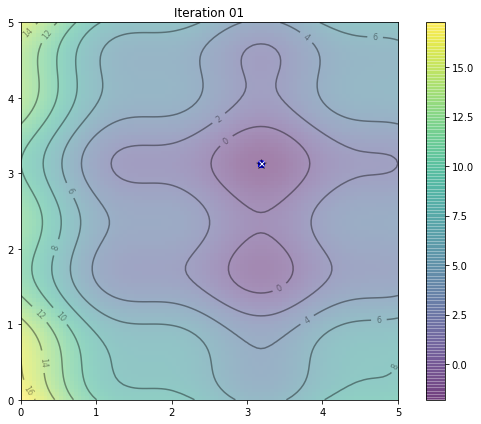

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter 
 
def f(x,y):
    "Objective function"
    return (x-3.14)**2 + (y-2.72)**2 + np.sin(3*x+1.41) + np.sin(4*y-1.73)
    
# Compute and plot the function in 3D within [0,5]x[0,5]
x, y = np.array(np.meshgrid(np.linspace(0,5,100), np.linspace(0,5,100)))
z = f(x, y)
 
# Find the global minimum
x_min = x.ravel()[z.argmin()]
y_min = y.ravel()[z.argmin()]
 
# Hyper-parameter of the algorithm
c1 = c2 = 0.1
w = 0.8
 
# Create particles
n_particles = 20
np.random.seed(100)
X = np.random.rand(2, n_particles) * 5
V = np.random.randn(2, n_particles) * 0.1
 
# Initialize data
pbest = X
pbest_obj = f(X[0], X[1])
gbest = pbest[:, pbest_obj.argmin()]
gbest_obj = pbest_obj.min()
 
def update():
    "Function to do one iteration of particle swarm optimization"
    global V, X, pbest, pbest_obj, gbest, gbest_obj
    # Update params
    r1, r2 = np.random.rand(2)
    V = w * V + c1*r1*(pbest - X) + c2*r2*(gbest.reshape(-1,1)-X)
    X = X + V
    obj = f(X[0], X[1])
    pbest[:, (pbest_obj >= obj)] = X[:, (pbest_obj >= obj)]
    pbest_obj = np.array([pbest_obj, obj]).min(axis=0)
    gbest = pbest[:, pbest_obj.argmin()]
    gbest_obj = pbest_obj.min()
 
# Set up base figure: The contour map
# With the global minimum showed as "X" on the plot
fig, ax = plt.subplots(figsize=(8,6))
fig.set_tight_layout(True)
img = ax.imshow(z, extent=[0, 5, 0, 5], origin='lower', cmap='viridis', alpha=0.5)
fig.colorbar(img, ax=ax)
ax.plot([x_min], [y_min], marker='x', markersize=5, color="white")
contours = ax.contour(x, y, z, 10, colors='black', alpha=0.4)
ax.clabel(contours, inline=True, fontsize=8, fmt="%.0f")
pbest_plot = ax.scatter(pbest[0], pbest[1], marker='o', color='black', alpha=0.5)
p_plot = ax.scatter(X[0], X[1], marker='o', color='blue', alpha=0.5)
p_arrow = ax.quiver(X[0], X[1], V[0], V[1], color='blue', width=0.005, angles='xy', scale_units='xy', scale=1)
gbest_plot = plt.scatter([gbest[0]], [gbest[1]], marker='*', s=100, color='black', alpha=0.4)
ax.set_xlim([0,5])
ax.set_ylim([0,5])
 
def animate(i):
    "Steps of PSO: algorithm update and show in plot"
    title = 'Iteration {:02d}'.format(i)
    # Update params
    update()
    # Set picture
    ax.set_title(title)
    pbest_plot.set_offsets(pbest.T)
    p_plot.set_offsets(X.T)
    p_arrow.set_offsets(X.T)
    p_arrow.set_UVC(V[0], V[1])
    gbest_plot.set_offsets(gbest.reshape(1,-1))
    return ax, pbest_plot, p_plot, p_arrow, gbest_plot
 
anim = FuncAnimation(fig, animate, frames=list(range(1,50)), interval=500, blit=False, repeat=True)
anim.save("PSO.gif", dpi=120, writer="pillow")
 
print("PSO found best solution at f({})={}".format(gbest, gbest_obj))
print("Global optimal at f({})={}".format([x_min,y_min], f(x_min,y_min)))

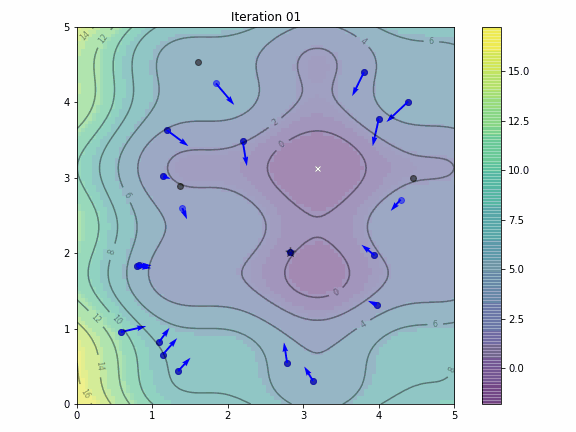

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython import display

gifPath = "./PSO.gif"
with open(gifPath,'rb') as f:
    display.Image(data=f.read(), format='png')

# More dimensions

https://towardsdatascience.com/swarm-intelligence-coding-and-visualising-particle-swarm-optimisation-in-python-253e1bd00772

**Notations:**

<li>Number of particles         : $i$
<li>Number of dimensions        : $n$
<li>Fitness function            : $f(x_i)$
<li>Particles                   : $x_i = (x_{i1}, x_{i2}, ..., x_{in})$
<li>Current velocity            : $v_i = (v_{i1}, v_{i2}, ..., v_{in})$
<li>Individual particle's best  : $p_i = (p_{i1}, p_{i2}, ..., p_{in})$
<li>Global particles' best      : $p_g = (p_{g1}, p_{g2}, ..., p_{gn})$
<li>Inertia component           : $w * v_i(t)$
<li>Cognitive component         : $c_1 * r_1 * (p_i - x_i(t))$
<li>Social component            : $c_2 * r_2 * (g_i - x_i(t))$
<li>Velocity adjustment         : $v_i(t+1) <- Inertia+Cognitive+Social$
<li>Position adjustment         : $x_i(t+1) <- x_i(t)+v_i(t+1)$

PSO algorithm:

1. Initialise the particle population array x_i
2. Loop
3. For each particle, calculate the fitness using the 
   fitness function f(x_i)
4. Compare the current fitness value with its best p_i. 
   Replace the best with the current value x_i 
   if it is better than the best.
5. Check the swarm’s best particle from individual particle’s best 
   and assign the best array to the global best p_g.
6. Calculate the velocity v_i(t+1) and update the position of 
   the particles to x_i(t+1)
7. If a criterion is met, exit the loop.
8. End loop

In [ ]:
import random
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

Define fitness function
<p>We use the function: f(x,y)=(x-2y+3)^2+(2x+y-8)^2. The global minimum of this function is 0. All particles should move from random points towards the optimal position of x and y coordinates, where the value becomes near 0.

In [ ]:
# Fitness function
# We assume the problem can be expressed by the following equation: 
# f(x1,x2)=(x1+2*-x2+3)^2 + (2*x1+x2-8)^2
# The objective is to find a minimum which is 0

def fitness_function(x1,x2):
  f1=x1+2*-x2+3
  f2=2*x1+x2-8
  z = f1**2+f2**2
  return z

**Update velocity**
<p>We apply the random values for r1,r2 and w. c1 and c2 are given smaller values at 0.1. The inertia value can be scheduled; starting from 0.9 and gradually reducing to 0.4. In our case, we generate the normal distribution with min 0.5 and max 1 and randomly select a value at each generation, following the experiments by [R. Eberhart and Yuhui Shi, “Particle swarm optimization: Developments, applications and resources,” Proceedings of the 2001 Congress on Evolutionary Computation (IEEE Cat. №01TH8546), Aug. 2002.].

In [ ]:
def update_velocity(particle, velocity, pbest, gbest, w_min=0.5, max=1.0, c=0.1):
  # Initialise new velocity array
  num_particle = len(particle)
  new_velocity = np.array([0.0 for i in range(num_particle)])
  # Randomly generate r1, r2 and inertia weight from normal distribution
  r1 = random.uniform(0,max)
  r2 = random.uniform(0,max)
  w = random.uniform(w_min,max)
  c1 = c
  c2 = c
  # Calculate new velocity
  for i in range(num_particle):
    new_velocity[i] = w*velocity[i] + c1*r1*(pbest[i]-particle[i])+c2*r2*(gbest[i]-particle[i])
  return new_velocity

**Update position**
<p>As described in the algorithm, the new position is a sum of the current position and velocity.

In [ ]:
def update_position(particle, velocity):
  # Move particles by adding velocity
  new_particle = particle + velocity
  return new_particle

**PSO's main function**

<p>Firstly, we initialise the particles, their best position, velocity and fitness value. We also set the global best position based on the particles’ initial position. Then we loop from one generation to another. The algorithm should stop when it reaches the max number of generations or a success criterion. In our case, it is when the average fitness value surpasses a specific value.

In [ ]:
def pso_2d(population, dimension, position_min, position_max, generation, fitness_criterion):
  # Initialisation
  # Population
  particles = [[random.uniform(position_min, position_max) for j in range(dimension)] for i in range(population)]
  # Particle's best position
  pbest_position = particles
  # Fitness
  pbest_fitness = [fitness_function(p[0],p[1]) for p in particles]
  # Index of the best particle
  gbest_index = np.argmin(pbest_fitness)
  # Global best particle position
  gbest_position = pbest_position[gbest_index]
  # Velocity (starting from 0 speed)
  velocity = [[0.0 for j in range(dimension)] for i in range(population)]
  
  # Loop for the number of generation
  for t in range(generation):
    image = ax.scatter3D([
                          particles[n][0] for n in range(population)],
                         [particles[n][1] for n in range(population)],
                         [fitness_function(particles[n][0],particles[n][1]) for n in range(population)], c='b')
    images.append([image])
    # Stop if the average fitness value reached a predefined success criterion
    if np.average(pbest_fitness) <= fitness_criterion:
      break
    else:
      for n in range(population):
        # Update the velocity of each particle
        velocity[n] = update_velocity(particles[n], velocity[n], pbest_position[n], gbest_position)
        # Move the particles to new position
        particles[n] = update_position(particles[n], velocity[n])
    # Calculate the fitness value
    pbest_fitness = [fitness_function(p[0],p[1]) for p in particles]
    # Find the index of the best particle
    gbest_index = np.argmin(pbest_fitness)
    # Update the position of the best particle
    gbest_position = pbest_position[gbest_index]

  # Print the results
  print('Global Best Position: ', gbest_position)
  print('Best Fitness Value: ', min(pbest_fitness))
  print('Average Particle Best Fitness Value: ', np.average(pbest_fitness))
  print('Number of Generation: ', t)

Set parameter values and run the algorithm

In [ ]:
population = 100
dimension = 2
position_min = -100.0
position_max = 100.0
generation = 400
fitness_criterion = 10e-4

<p>We created 100 particles, of which positions were randomly placed at x and y coordinates, ranging between -100 and 100. As the function takes x and y, the particle’s position is 2-dimensional. The success criterion is 0.001 or lower. The programme should stop before the 400th generation if the criterion is met.

<p>By running the algorithm with the above configurations, we obtained the following outcome:

In [ ]:
pso_2d(population, dimension, position_min, position_max, generation, fitness_criterion)

Global Best Position:  [2.59994872 2.79994292]
Best Fitness Value:  2.9443414173719735e-08
Average Particle Best Fitness Value:  0.0008966651121982014
Number of Generation:  67


Matplotlib plot and animation (3D)

Text(0.5, 0, 'x')

Text(0.5, 0, 'y')

Text(0.5, 0, 'z')

Global Best Position:  [2.59999974 2.80002271]
Best Fitness Value:  2.578627968896267e-09
Average Particle Best Fitness Value:  0.00094860072405206
Number of Generation:  73


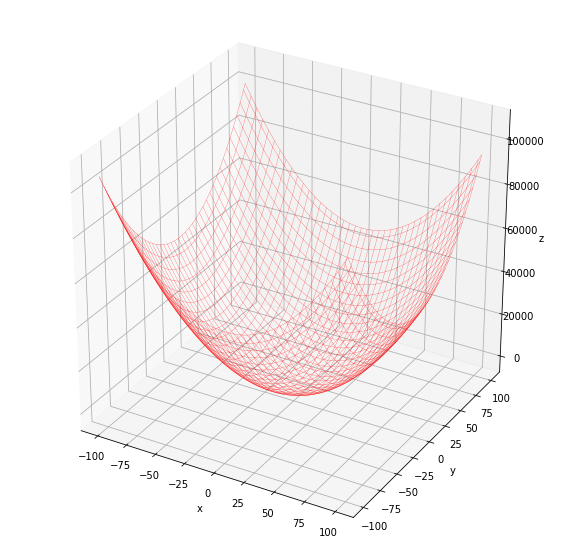

In [ ]:
# Plotting prepartion
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
x = np.linspace(position_min, position_max, 80)
y = np.linspace(position_min, position_max, 80)
X, Y = np.meshgrid(x, y)
Z= fitness_function(X,Y)
ax.plot_wireframe(X, Y, Z, color='r', linewidth=0.2)

# Animation image placeholder
images = []

pso_2d(population, dimension, position_min, position_max, generation, fitness_criterion)

# Generate the animation image and save
animated_image = animation.ArtistAnimation(fig, images)
animated_image.save('./pso_simple.gif', writer='pillow')

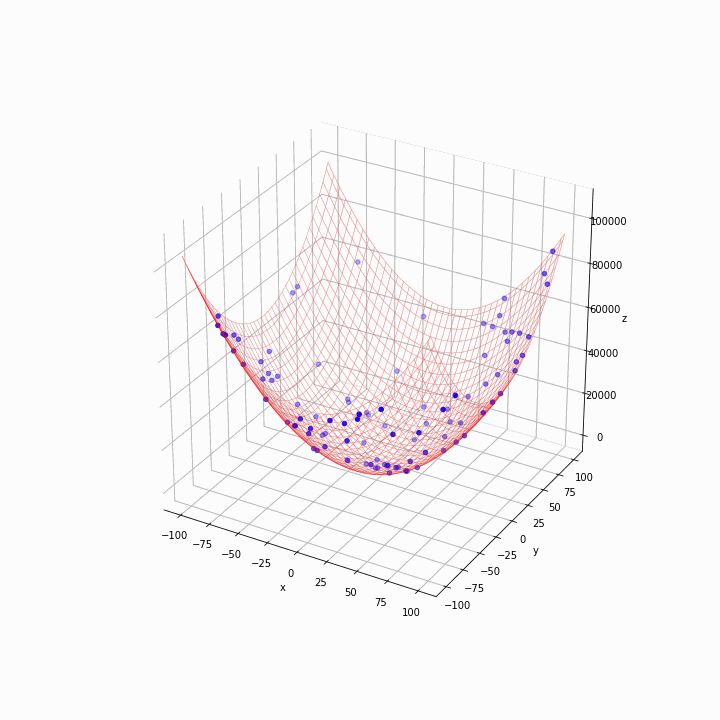

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython import display

gifPath = "./pso_simple.gif"
with open(gifPath,'rb') as f:
    display.Image(data=f.read(), format='png')

This works for larger dimensions as well:

In [ ]:
population = 100
dimension = 7
position_min = -100.0
position_max = 100.0
generation = 400
fitness_criterion = 10e-4

In [ ]:
pso_2d(population, dimension, position_min, position_max, generation, fitness_criterion)

Global Best Position:  [  2.59979215   2.79998554 -65.62694135 -29.16567474 -60.46123507
  66.82918536 -36.37562897]
Best Fitness Value:  2.170555396284742e-07
Average Particle Best Fitness Value:  0.0008808034862926887
Number of Generation:  68


# Application 1: Feature selection using Particle Swarm Optimization

https://niapy.org/en/stable/tutorials/feature_selection.html?fbclid=IwAR0RZ_VVJ8GOA8P0oZQGCQCKW0HBw2fUg84CMd9pUm6DAujLiTNmCu81Mso

We’ll be using Particle Swarm Optimization to find an optimal subset of features for a SVM classifier. We will be testing our implementation on the UCI ML Breast Cancer Wisconsin (Diagnostic) dataset.

In [ ]:
!pip install niapy --pre
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 181 kB 8.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


We want to select a subset of relevant features for use in model construction, in order to make prediction faster and more accurate. We will be using Particle Swarm Optimization to search for the optimal subset of features.

Our solution vector will represent a subset of features:

$x = [x_1,x_2,...,x_d], x_i \in [0,1]$

Where $d$ is the total number of features in the dataset. We will then use a threshold of 0.5 to determine whether the feature will be selected:

$x_i = 1\text{ if } x_i > 0.5\text{ and } x_i = 0\text{ otherwise}$
 
The function we’ll be optimizing is the classification accuracy penalized by the number of features selected, that means we’ll be minimizing the following function:

$f(x) = \alpha * (1-P)+(1-\alpha)*\frac{Num\_selected}{Num\_features}$
 
Where $\alpha$ is the parameter that decides the tradeoff between classifier performance $P$ (classification accuracy in our case) and the number of selected features with respect to the number of all features.

First we’ll implement the Problem class, which implements the optimization function defined above. It takes the training dataset, and the $\alpha$ parameter, which is set to 0.99 by default.

For the objective function, the solution vector is first converted to binary, using the threshold value of 0.5. That gives us indices of the selected features. If no features were selected 1.0 is returned as the fitness. We then compute the mean accuracy of running 2-fold cross validation on the training set, and calculate the value of the optimization function defined above.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC

from niapy.problems import Problem
from niapy.task import Task
from niapy.algorithms.basic import ParticleSwarmOptimization


class SVMFeatureSelection(Problem):
    def __init__(self, X_train, y_train, alpha=0.99):
        super().__init__(dimension=X_train.shape[1], lower=0, upper=1)
        self.X_train = X_train
        self.y_train = y_train
        self.alpha = alpha

    def _evaluate(self, x):
        selected = x > 0.5
        num_selected = selected.sum()
        if num_selected == 0:
            return 1.0
        accuracy = cross_val_score(SVC(), self.X_train[:, selected], self.y_train, cv=2, n_jobs=-1).mean()
        score = 1 - accuracy
        num_features = self.X_train.shape[1]
        return self.alpha * score + (1 - self.alpha) * (num_selected / num_features)

Then all we have left to do is load the dataset, run the algorithm and compare the results.

In [ ]:
dataset = load_breast_cancer()
X = dataset.data
y = dataset.target
feature_names = dataset.feature_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1234)

problem = SVMFeatureSelection(X_train, y_train)
task = Task(problem, max_iters=100)
algorithm = ParticleSwarmOptimization(population_size=10, seed=1234)
best_features, best_fitness = algorithm.run(task)

selected_features = best_features > 0.5
print('Number of selected features:', selected_features.sum())
print('Selected features:', ', '.join(feature_names[selected_features].tolist()))

model_selected = SVC()
model_all = SVC()

model_selected.fit(X_train[:, selected_features], y_train)
print('Subset accuracy:', model_selected.score(X_test[:, selected_features], y_test))

model_all.fit(X_train, y_train)
print('All Features Accuracy:', model_all.score(X_test, y_test))

Number of selected features: 4
Selected features: mean smoothness, mean concavity, mean symmetry, worst area
Subset accuracy: 0.9210526315789473
All Features Accuracy: 0.9122807017543859


In [ ]:
feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

# Application 2: Particle swarm optimization (PSO) with constraint support

In [ ]:
!pip install --upgrade pyswarm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4480 sha256=976f6d2f78ee3cd6871e9d19cbb0930318da4587b7967e6e7dbe3ea3e5cf6627
  Stored in directory: /root/.cache/pip/wheels/3b/48/7f/a9f4beb272837304aa8e55fda9c9b4243d23517d5b1349b052
Successfully built pyswarm


To illustrate how pyswarm is to be best utilized, we’ll start with a complete example, which will be explained step-by-step afterwards:

In [ ]:
from pyswarm import pso

'''
We define the objective function to be minimized, which should be defined like myfunction(x, *args, **kwargs). In other words, 
it takes as its first argument an 1-d array-like object, followed by any other (optional) arguments and (again, optional) keyword arguments. 
The function should return a single scalar value that is minimized. In this example, the banana function:
'''

def banana(x):
    x1 = x[0]
    x2 = x[1]
    return x1**4 - 2*x2*x1**2 + x2**2 + x1**2 - 2*x1 + 5

'''
Optimizing with constraints is optional, but we include one here to illustrate how it might be done in the con function which has the same call syntax as the objective, 
but returns an array of values (even if it only has a single value in it):
'''
def con(x):
    x1 = x[0]
    x2 = x[1]
    return [-(x1 + 0.25)**2 + 0.75*x2]

'''
Rather than specify a starting point for the algorithm, we define the limits of the input variables that the optimizer is allowed to search within. 
For the sake of clarity, we have defined them prior to calling the optimizer in the objects lb and ub, which stand for lower-bound and upper-bound, respectively:
'''

lb = [-3, -1]
ub = [2, 6]

'''
Using the kwarg f_ieqcons tells the routine that there’s a single constraint function that returns an array object.
'''
xopt, fopt = pso(banana, lb, ub, f_ieqcons=con)

#Once complete, pso returns two objects: 1) the optimal input values and 2) the optimal objective value.

# Optimum should be around x=[0.5, 0.76] with banana(x)=4.5 and con(x)=0

Stopping search: Swarm best objective change less than 1e-08


In [ ]:
print('Optimal input values: {0} \nOptimal objective value: {1}'.format(xopt, fopt))

Optimal input values: [0.49911198 0.74822502] 
Optimal objective value: 4.500001839943001


**Other parameters of the pso function:**

pso(func, lb, ub, ieqcons=[], f_ieqcons=None, args=(), kwargs={},
    swarmsize=100, omega=0.5, phip=0.5, phig=0.5, maxiter=100, minstep=1e-8,
    minfunc=1e-8, debug=False)

The parameters omega, phig and phip are a way of controlling how closely the particles move away from their own best known position and the best known position of all the particles in the swarm. These can take any scalar value, but values between 0 and 1 seem to work best.

Finally, the parameters maxiter, minstep and minfunc are used to tell the swarm when to stop searching. The last parameter debug can be used to print out progress statements about the swarm.

**An Engineering Example**

Another useful example is in the design of a two-bar truss in the shape of an A-frame. The objective of the problem is to minimize the weight of the truss while satisfying three design constraints:

*   Yield Stress <= 100 kpsi
*   Yield Stress <= Buckling Stress
*   Deflection <= 0.25 in


The design variables are:

*   H: the height of the truss, in inches
*   d: the diameter of the truss tubes, in inches
*   t: the wall thickness of the tubes, in inches

Other parameters that will be held constant are:

*   B: the base separation distance, in inches
*   rho: the density of the truss material, in lb/in^3
*   E: the modulus of elasticity of the truss material, in kpsi (1000-psi)
*   P: the downward vertical load on the top of the truss, in kip (1000-lbf)

This example shows how the optional args parameter may be used to pass other needed values to the objective and constraint functions. The complete code is as follows:

In [ ]:
import numpy as np
from pyswarm import pso

# Define the objective (to be minimize)
def weight(x, *args):
    H, d, t = x
    B, rho, E, P = args
    return rho*2*np.pi*d*t*np.sqrt((B/2)**2 + H**2)

# Setup the constraint functions
def yield_stress(x, *args):
    H, d, t = x
    B, rho, E, P = args
    return (P*np.sqrt((B/2)**2 + H**2))/(2*t*np.pi*d*H)

def buckling_stress(x, *args):
    H, d, t = x
    B, rho, E, P = args
    return (np.pi**2*E*(d**2 + t**2))/(8*((B/2)**2 + H**2))

def deflection(x, *args):
    H, d, t = x
    B, rho, E, P = args
    return (P*np.sqrt((B/2)**2 + H**2)**3)/(2*t*np.pi*d*H**2*E)

def constraints(x, *args):
    strs = yield_stress(x, *args)
    buck = buckling_stress(x, *args)
    defl = deflection(x, *args)
    return [100 - strs, buck - strs, 0.25 - defl]

# Define the other parameters
B = 60  # inches
rho = 0.3  # lb/in^3
E = 30000  # kpsi (1000-psi)
P = 66  # kip (1000-lbs, force)
args = (B, rho, E, P)

# Define the lower and upper bounds for H, d, t, respectively
lb = [10, 1, 0.01]
ub = [30, 3, 0.25]

xopt, fopt = pso(weight, lb, ub, f_ieqcons=constraints, args=args)

# The optimal input values are approximately
#     xopt = [29, 2.4, 0.06]
# with function values approximately
#     weight          = 12 lbs
#     yield stress    = 100 kpsi (binding constraint)
#     buckling stress = 150 kpsi
#     deflection      = 0.2 in

Stopping search: Swarm best objective change less than 1e-08


In [ ]:
print('Optimal input values: {0} \nOptimal objective value: {1}'.format(xopt, fopt))

Optimal input values: [29.99999473  2.3267268   0.063846  ] 
Optimal objective value: 11.880000001367307


Because there’s an aspect of randomness in the algorithm, it is common to get a slightly different result each time it is run. This is to be expected.

# Application 3: Hyperparameter optimalization with Particle Swarm Optimization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import datasets
import scipy.stats as stats

In [2]:
d = datasets.load_digits()
X = d.data
y = d.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

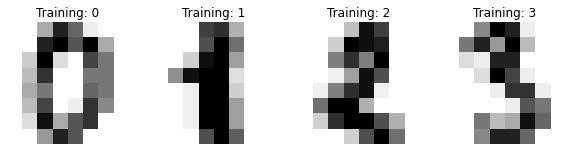

In [3]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, d.images, d.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)
plt.show()

In [4]:
# baseline random forest
clf = RandomForestClassifier(n_estimators=10, max_depth=2)

clf.fit(X_train,y_train)
scores = cross_val_score(clf, X, y, scoring='accuracy')
print("Training: "+str(clf.score(X_train,y_train)))
print("Test: "+str(clf.score(X_test,y_test)))
print("Accuracy: "+ str(scores.mean()))

Training: 0.7514546965918537
Test: 0.7457912457912458
Accuracy: 0.7073073351903435


In [5]:
%%capture
!pip install optunity

We give the optimizer the space of hyperparameters it can choose from and with the PSO algorithm it will compute a good combination.

In [6]:
# Random Forest PSO
import optunity
import optunity.metrics

data = X
labels = y.tolist()

# Define the hyperparameter configuration space
search = {
    'n_estimators': [10, 100],
    'max_features': [1, 64],
    'max_depth': [5,50],
    "min_samples_split": [2,11],
    "min_samples_leaf": [1,11],
    "criterion": [0,1]
         }

# Define the objective function
@optunity.cross_validated(x=data, y=labels, num_folds=3)
def performance(x_train, y_train, x_test, y_test, n_estimators=None, max_features=None, max_depth=None, min_samples_split=None, min_samples_leaf=None, criterion=None):
    # fit the model
    if criterion<0.5:
        cri='gini'
    else:
        cri='entropy'
    model = RandomForestClassifier(n_estimators=int(n_estimators),
                                   max_features=int(max_features),
                                   max_depth=int(max_depth),
                                   min_samples_split=int(min_samples_split),
                                   min_samples_leaf=int(min_samples_leaf),
                                   criterion=cri,
                                  )
    #predictions = model.predict(x_test)
    scores = np.mean(cross_val_score(model, X, y, cv=3, n_jobs=-1,
                                    scoring="accuracy"))
    #return optunity.metrics.roc_auc(y_test, predictions, positive=True)
    return scores#optunity.metrics.accuracy(y_test, predictions)

optimal_configuration, info, _ = optunity.maximize(performance,
                                                  solver_name='particle swarm',
                                                  num_evals=20,
                                                   **search
                                                  )
print(optimal_configuration)
print("Accuracy: "+ str(info.optimum))

{'n_estimators': 92.5732421875, 'max_features': 9.58251953125, 'max_depth': 47.91259765625, 'min_samples_split': 6.71533203125, 'min_samples_leaf': 2.4892578125, 'criterion': 0.00927734375}
Accuracy: 0.9326655537006121
